# Build machine learning models



 ## 0. Import data

In [3]:
# Import libraries
from tensorflow.keras.datasets import mnist

# Load MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

## 1. Feature Selection

In [4]:
import numpy as np
# Reshape data for some techniques
X_train_flat = X_train.reshape(len(X_train), -1)
X_test_flat = X_test.reshape(len(X_test), -1)

# PCA for dimensionality reduction
from sklearn.decomposition import PCA
pca = PCA(n_components=50)
X_train_pca = pca.fit_transform(X_train_flat)
X_test_pca = pca.transform(X_test_flat)

# Feature importance with Random Forest
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100)
rf.fit(X_train_flat, y_train)
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]

# Select top 100 features based on importance
X_train_selected = X_train_flat[:, indices[:100]]
X_test_selected = X_test_flat[:, indices[:100]]

In [5]:
X_train_flat.shape

(60000, 784)

### Strating from here for the model building

In [ ]:
# Train Logistic Regression
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(solver='sag', max_iter=1000)
lr.fit(X_train_selected, y_train)

# Train K-Nearest Neighbors
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_selected, y_train)

# Train Support Vector Machine
from sklearn.svm import SVC
svm = SVC()
svm.fit(X_train_selected, y_train)

# Train Random Forest again with selected features
rf = RandomForestClassifier(n_estimators=100)
rf.fit(X_train_selected, y_train)


In [2]:
from matplotlib import pyplot
#
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
#
from sklearn.linear_model import LogisticRegression                         # <---
#
from sklearn.tree import DecisionTreeClassifier                             # <---
#
from sklearn.neighbors import KNeighborsClassifier                          # <---
#
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis        # <---
#
from sklearn.naive_bayes import GaussianNB                                  # <---
#
from sklearn.svm import SVC                                                 # <---

In [ ]:
%%time
# Compare Algorithms

# prepare models
models = []
#models.append(( 'LR'   , LogisticRegression(solver='sag', max_iter=500)))    # avoid warnings with (solver='lbfgs', max_iter=500)
models.append(( 'LDA'  , LinearDiscriminantAnalysis()))
models.append(( 'KNN'  , KNeighborsClassifier()))
models.append(( 'CART' , DecisionTreeClassifier()))
models.append(( 'NB'   , GaussianNB()))
models.append(( 'SVM' , SVC()))                                                # avoid warnings with (gamma='scale')

# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model in models:
  kfold = KFold(n_splits=10, random_state=7, shuffle=True)
  cv_results = cross_val_score(model, X_train_flat, y_train, cv=kfold, scoring=scoring)
  results.append(cv_results)
  names.append(name)
  msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
  print(msg)


LDA: 0.863967 (0.004661)
KNN: 0.971500 (0.003105)
CART: 0.872300 (0.005907)
NB: 0.563217 (0.010782)
SVM: 0.978700 (0.001483)
CPU times: user 1h 5min 56s, sys: 49.9 s, total: 1h 6min 46s
Wall time: 1h 3min 15s


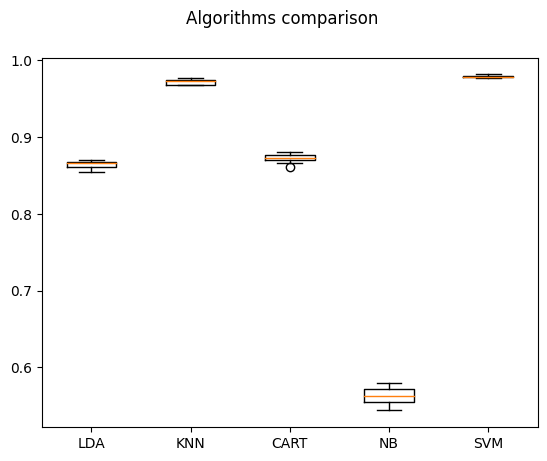

In [ ]:
# boxplot algorithm comparison
fig = pyplot.figure()
fig.suptitle('Algorithms comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

# Train Logistic Regression model using PCA transformed features
model_pca = LogisticRegression(solver = 'sag',max_iter=1000)
model_pca.fit(X_train_pca, y_train)

# Evaluate model_pca on the test set
predictions_pca = model_pca.predict(X_test_pca)
accuracy_pca = accuracy_score(y_test, predictions_pca)
conf_matrix_pca = confusion_matrix(y_test, predictions_pca)

print("Logistic Regression with PCA:")
print("Accuracy:", accuracy_pca)
print("Confusion Matrix:")
print(conf_matrix_pca)

Logistic Regression with PCA:
Accuracy: 0.9055
Confusion Matrix:
[[ 952    0    1    2    0   10   10    3    2    0]
 [   0 1105    2    3    1    3    4    2   15    0]
 [  12   10  903   12   15    1   13   20   35   11]
 [   6    4   19  905    1   29    3   16   17   10]
 [   2    5    4    2  911    1   11    2    6   38]
 [  13    4    8   47   12  743   17    7   29   12]
 [  14    3    5    1   13   11  904    4    3    0]
 [   1   14   24    5    8    0    1  941    1   33]
 [  13   19    7   35   13   36   18   16  801   16]
 [  13    7    4   11   42   10    0   26    6  890]]


In [ ]:
# Perform SelectKBest feature selection
from sklearn.feature_selection import SelectKBest, chi2
selector = SelectKBest(chi2, k=10)  # Select top 10 features using chi2
X_train_reshaped = X_train.reshape((X_train.shape[0], -1))  # Flatten samples, features, channels

X_train_kbest = selector.fit_transform(X_train_reshaped, y_train)

# Train Logistic Regression model using SelectKBest transformed features
model_kbest = LogisticRegression(solver='sag', max_iter=1000)
model_kbest.fit(X_train_kbest, y_train)

X_test_reshaped = X_test.reshape((X_test.shape[0], -1))  # Flatten samples, features, channels

# Apply SelectKBest to test data using the same parameters
X_test_kbest = selector.transform(X_test_reshaped)

# Evaluate model_kbest on the test set
predictions_kbest = model_kbest.predict(X_test_kbest)
accuracy_kbest = accuracy_score(y_test, predictions_kbest)
conf_matrix_kbest = confusion_matrix(y_test, predictions_kbest)

print("\nLogistic Regression with SelectKBest:")
print("Accuracy:", accuracy_kbest)
print("Confusion Matrix:")
print(conf_matrix_kbest)



Logistic Regression with SelectKBest:
Accuracy: 0.3924
Confusion Matrix:
[[ 613    1   94    5   43    5  113   93    8    5]
 [   0 1013    2   40    1   12    0   16    3   48]
 [  64   86  394   68   42   85   28  225   11   29]
 [   6  462   53  310    6   34   19   68    6   46]
 [  19   57   17   16  138    4  112  555    5   59]
 [   6  135  136  164   16  113   33  228   25   36]
 [ 121   65   39   38   98    8  311  235    7   36]
 [  14   51    8   14   14    5   24  841   14   43]
 [  25  340   64   69    3   31   19  271   86   66]
 [  18  193    2    5   41    0   26  615    4  105]]


In [ ]:
y_train.shape

(60000,)

# 4. Evaluate Model Performance



In [ ]:
# Evaluate all models on test data
from sklearn.metrics import accuracy_score

models = [lr, knn, svm, rf]
model_names = ["Logistic Regression", "K-Nearest Neighbors", "SVM", "Random Forest"]
results = []
for model, name in zip(models, model_names):
  predictions = model.predict(X_test_selected)
  accuracy = accuracy_score(y_test, predictions)
  results.append(accuracy)
  print(f"{name} accuracy: {accuracy:.4f}")


Logistic Regression accuracy: 0.8709
K-Nearest Neighbors accuracy: 0.9439
SVM accuracy: 0.9640
Random Forest accuracy: 0.9474


# 5. Hyperparameter Tuning (Example with Random Forest)



In [ ]:
# GridSearchCV for hyperparameter tuning
from sklearn.model_selection import GridSearchCV

param_grid = {
  "n_estimators": [50, 100, 200],
  "max_depth": [3, 5, 7],
}

grid_search = GridSearchCV(rf, param_grid, cv=5)
grid_search.fit(X_train_selected, y_train)

# Print best parameters and accuracy
print("Best parameters:", grid_search.best_params_)
print("Best accuracy:", grid_search.best_score_)


Best parameters: {'max_depth': 7, 'n_estimators': 200}
Best accuracy: 0.8734500000000001
